In [7]:
import os
os.chdir("C:\\Users\\Classroom4\\Desktop\\20191019_Batch67_CSE7321c_ANN_Lab")
os.getcwd()

'C:\\Users\\Classroom4\\Desktop\\20191019_Batch67_CSE7321c_ANN_Lab'

In [8]:
## Reading the dataset
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
diabetes = pd.read_csv("processed_diabetes.csv")
print(diabetes.shape)
diabetes.head()

(768, 9)


,PregnantFreq,PlasmaGlucose,DiastolicBP,TricepSkinThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Target
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [9]:
diabetes.shape

(768, 9)

### Decoupling "Target"

In [10]:
X = diabetes.loc[:,diabetes.columns.difference(['Target'])]
y = diabetes['Target']

In [11]:
y.value_counts()

0    500
1    268
Name: Target, dtype: int64

### Train-Test split

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=2324)

### Standardizing independent variables

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_std = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

### Checking summary statistics to verify standardization

In [14]:
X_train_std.describe()

,Age,BMI,DiabetesPedigree,DiastolicBP,PlasmaGlucose,PregnantFreq,SerumInsulin,TricepSkinThickness
count,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02
mean,-1.531984e-16,-2.071589e-16,-3.824791e-17,-1.128417e-15,-4.465702e-16,3.059833e-17,-2.112938e-16,-8.848705e-17
std,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00
min,-1.062535e+00,-2.073153e+00,-1.182553e+00,-3.901109e+00,-2.189812e+00,-1.173398e+00,-1.706697e+00,-2.515918e+00
25%,-8.115833e-01,-7.028923e-01,-6.943776e-01,-7.011507e-01,-7.144832e-01,-8.770130e-01,-4.045946e-01,-4.856906e-01
50%,-3.096790e-01,-1.776200e-02,-3.153598e-01,-2.874464e-02,-1.444700e-01,-2.842427e-01,3.623793e-02,-1.722467e-02
75%,6.104789e-01,6.090594e-01,5.245437e-01,5.788328e-01,6.267244e-01,6.049127e-01,3.623793e-02,3.038423e-01
max,3.956507e+00,5.055118e+00,5.624608e+00,3.298798e+00,2.537945e+00,3.865149e+00,8.598512e+00,7.860800e+00


### Building a perceptron (single layer - single node)

In [15]:
import keras
from keras import regularizers, optimizers
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

## Defining my optimizer - Its just a refined form of SGD
## ref - https://keras.io/optimizers/
adam = keras.optimizers.Adam(lr=0.01, decay=0.0005)

## Just a way to define neural nets. There are two ways sequential and functional
## Sequential model lets you add neural net layers one after another by calling function
model = Sequential()

## Adding one layer having only one neuron
## Notice our data has 8 input columns which goes into as the "input_shape" parameter
## Notice the use of l2 regularizer

model.add(Dense(1,input_shape=(8,), activation='sigmoid', kernel_regularizer=regularizers.l2()))

## Callbacks
earlystopper = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
reduce_lr = ReduceLROnPlateau(patience=5, verbose=1)

## Compiling the model and defining loss function
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

## Training neural nets
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=200, batch_size=16, callbacks=[reduce_lr, earlystopper])

Using TensorFlow backend.


Train on 537 samples, validate on 231 samples
Epoch 1/200
537/537 [==============================] - 1s 938us/step - loss: 10.4060 - acc: 0.3482 - val_loss: 10.3596 - val_acc: 0.3506
Epoch 2/200
537/537 [==============================] - 0s 83us/step - loss: 6.4546 - acc: 0.4953 - val_loss: 4.2424 - val_acc: 0.4892
Epoch 3/200
537/537 [==============================] - 0s 87us/step - loss: 2.8137 - acc: 0.5512 - val_loss: 2.8463 - val_acc: 0.5022
Epoch 4/200
537/537 [==============================] - 0s 204us/step - loss: 1.9754 - acc: 0.5773 - val_loss: 1.3534 - val_acc: 0.6277
Epoch 5/200
537/537 [==============================] - 0s 98us/step - loss: 1.2724 - acc: 0.5978 - val_loss: 0.9039 - val_acc: 0.6234
Epoch 6/200
537/537 [==============================] - 0s 95us/step - loss: 1.0644 - acc: 0.5996 - val_loss: 1.0013 - val_acc: 0.5801
Epoch 7/200
537/537 [==============================] - 0s 89us/step - loss: 1.0358 - acc: 0.6108 - val_loss: 0.7646 - val_acc: 0.6450
Epoch 8/200


In [17]:
pd.DataFrame(history.history)

,acc,loss,lr,val_acc,val_loss
0,0.348231,10.406028,0.0100,0.350649,10.359594
1,0.495345,6.454626,0.0100,0.489177,4.242435
2,0.551210,2.813713,0.0100,0.502165,2.846291
3,0.577281,1.975372,0.0100,0.627706,1.353412
4,0.597765,1.272424,0.0100,0.623377,0.903861
5,0.599628,1.064417,0.0100,0.580087,1.001310
6,0.610801,1.035798,0.0100,0.645022,0.764627
7,0.653631,0.846558,0.0100,0.515152,1.085035
8,0.618250,1.057349,0.0100,0.510823,1.078353
9,0.640596,0.767661,0.0100,0.705628,0.745096


In [19]:
train_acc = history.history['acc']
train_loss = history.history['loss']

val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

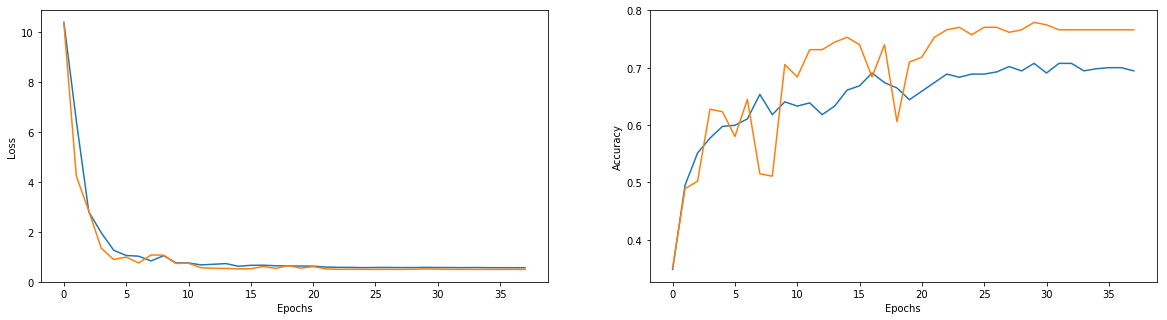

In [20]:
from matplotlib import pyplot as plt #plt is a visualization module in matplotlib.  
%matplotlib inline 
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(train_loss)
plt.plot(val_loss)

plt.subplot(1,2,2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(train_acc)
plt.plot(val_acc)
plt.show()

In [26]:
# !pip install graphviz

In [31]:
from ann_visualizer.visualize import ann_viz
ann_viz(model,title="mlp neural network")

### Perceptron performance

In [28]:
from sklearn.metrics import accuracy_score
perceptron_train_preds = model.predict_classes(X_train)
perceptron_test_preds = model.predict_classes(X_test)

print("Train Accuracy :",accuracy_score(y_train,perceptron_train_preds))
print("Test_Accuray   : ",accuracy_score(y_test,perceptron_test_preds))

Train Accuracy : 0.6964618249534451
Test_Accuray   :  0.7662337662337663


### Checking Logistic Regression performance

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logistic_model = LogisticRegression(random_state=1234,tol=0.01)

logistic_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1234, solver='warn',
          tol=0.01, verbose=0, warm_start=False)

In [30]:
logistic_train_preds = logistic_model.predict(X_train)
logistic_test_preds = logistic_model.predict(X_test)

print("Train Accuracy :  ",accuracy_score(y_train,logistic_train_preds))
print("Test Accuracy  :  ",accuracy_score(y_test,logistic_test_preds))

Train Accuracy :   0.6983240223463687
Test Accuracy  :   0.7619047619047619


## Multilayer Perceptron

In [42]:
import keras
from keras import regularizers, optimizers
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

## Defining my optimizer - Its just a refined form of SGD
## ref - https://keras.io/optimizers/
adam = keras.optimizers.Adam(lr=0.01, decay=0.0005)

## Just a way to define neural nets. There are two ways sequential and functional
## Sequential model lets you add neural net layers one after another by calling function
model = Sequential()

## Adding one layer having only one neuron
## Notice our data has 8 input columns which goes into as the "input_shape" parameter
## Notice the use of l2 regularizer
model.add(Dense(5, input_shape=(8,)))
model.add(Dense(8,))
model.add(Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2()))

## Callbacks
earlystopper = EarlyStopping(monitor='val_loss', patience=10)
reduce_lr = ReduceLROnPlateau(patience=5, verbose=1)

## Compiling the model and defining loss function
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

## Training neural nets
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=200, batch_size=16, callbacks=[reduce_lr, earlystopper])

Train on 537 samples, validate on 231 samples
Epoch 1/200
537/537 [==============================] - 0s 901us/step - loss: 5.6203 - acc: 0.6518 - val_loss: 5.6545 - val_acc: 0.6494
Epoch 2/200
537/537 [==============================] - 0s 88us/step - loss: 5.6140 - acc: 0.6518 - val_loss: 5.6521 - val_acc: 0.6494
Epoch 3/200
537/537 [==============================] - 0s 95us/step - loss: 5.1538 - acc: 0.6164 - val_loss: 2.6396 - val_acc: 0.6494
Epoch 4/200
537/537 [==============================] - 0s 91us/step - loss: 0.9290 - acc: 0.5996 - val_loss: 0.5963 - val_acc: 0.7489
Epoch 5/200
537/537 [==============================] - 0s 104us/step - loss: 0.6437 - acc: 0.6574 - val_loss: 0.6097 - val_acc: 0.7100
Epoch 6/200
537/537 [==============================] - 0s 97us/step - loss: 0.6179 - acc: 0.6648 - val_loss: 0.5673 - val_acc: 0.7316
Epoch 7/200
537/537 [==============================] - 0s 108us/step - loss: 0.6161 - acc: 0.6723 - val_loss: 0.5734 - val_acc: 0.6970
Epoch 8/200
5

In [43]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 48        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 9         
Total params: 102
Trainable params: 102
Non-trainable params: 0
_________________________________________________________________


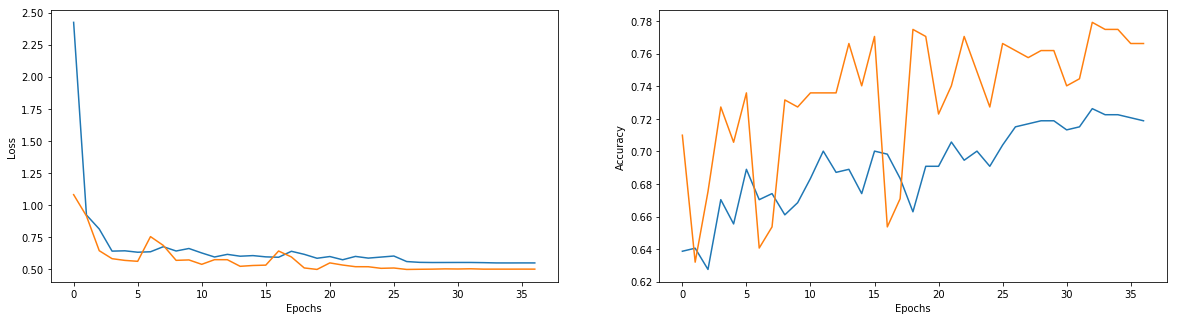

In [35]:
train_acc = history.history['acc']
train_loss = history.history['loss']

val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

from matplotlib import pyplot as plt #plt is a visualization module in matplotlib.  
%matplotlib inline 
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(train_loss)
plt.plot(val_loss)

plt.subplot(1,2,2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(train_acc)
plt.plot(val_acc)

In [36]:
ann_viz(model,title="mlp neural network")

In [37]:
from sklearn.metrics import accuracy_score
mlp_train_preds = model.predict_classes(X_train)
mlp_test_preds = model.predict_classes(X_test)

print("Train Accuracy :  ",accuracy_score(y_train,mlp_train_preds))
print("Test Accuracy  :  ",accuracy_score(y_test,mlp_test_preds))

Train Accuracy :   0.7188081936685289
Test Accuracy  :   0.7662337662337663


## SKLEARN MLP CLASSIFIER

In [38]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(activation='logistic',batch_size=64,random_state=1234,hidden_layer_sizes=(21,))
model.fit(X_train,y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size=64, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(21,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1234, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [39]:
from sklearn.metrics import accuracy_score
sklearn_mlp_train_preds = model.predict(X_train)
sklearn_mlp_test_preds = model.predict(X_test)

print("Train Accuracy  :  ",accuracy_score(y_train,sklearn_mlp_train_preds))
print("Test Accuracy   :  ",accuracy_score(y_test,sklearn_mlp_test_preds))

Train Accuracy  :   0.74487895716946
Test Accuracy   :   0.7359307359307359


## Grid Search CV

#### Scoring with f1-score

In [40]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score,recall_score

mlp_grid=  MLPClassifier(activation='logistic',random_state=1234)
# Use a grid over parameters of interest


param_grid = {"batch_size" : [16, 32, 64, 128],
           "hidden_layer_sizes" : [(11,), (15,), (19,),(21,)],
           "max_iter" : [50, 100, 150, 200]}
 
mlp_cv_grid = GridSearchCV(estimator = mlp_grid, param_grid = param_grid, cv = 3,
                                scoring = make_scorer(lambda yt,yp: recall_score(yt,yp,pos_label = 1)))
mlp_cv_grid.fit(X_train, y_train)
mlp_cv_grid.best_estimator_

C:\Users\Classroom4\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size=16, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(21,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1234, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [41]:
sklearn_mlp_train_preds = mlp_cv_grid.best_estimator_.predict(X_train)
sklearn_mlp_test_preds = mlp_cv_grid.best_estimator_.predict(X_test)

print("Train Accuracy  :  ",accuracy_score(y_train,sklearn_mlp_train_preds))
print("Test Accuracy   :  ",accuracy_score(y_test,sklearn_mlp_test_preds))

Train Accuracy  :   0.7560521415270018
Test Accuracy   :   0.7489177489177489


#### Scoring with Accuracy

In [22]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score

mlp_grid=  MLPClassifier(activation='logistic',random_state=1234)
# Use a grid over parameters of interest


param_grid = {"batch_size" : [16, 32, 64, 128],
           "hidden_layer_sizes" : [(11,), (15,), (19,),(21,)],
           "max_iter" : [50, 100, 150, 200]}
 
mlp_cv_grid = GridSearchCV(estimator = mlp_grid, param_grid = param_grid, cv = 3,
                                scoring = 'accuracy')
mlp_cv_grid.fit(X_train, y_train)
mlp_cv_grid.best_estimator_

MLPClassifier(activation='logistic', alpha=0.0001, batch_size=16, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(19,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=150, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1234, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [23]:
sklearn_mlp_train_preds = mlp_cv_grid.best_estimator_.predict(X_train)
sklearn_mlp_test_preds = mlp_cv_grid.best_estimator_.predict(X_test)

print("Train Accuracy  :  ",accuracy_score(y_train,sklearn_mlp_train_preds))
print("Test Accuracy   :  ",accuracy_score(y_test,sklearn_mlp_test_preds))

Train Accuracy  :   0.7337057728119181
Test Accuracy   :   0.7489177489177489
